## Objective
- The objective of this project is to develop models that can accurately predict the price of diamonds. By analyzing various features associated with diamonds, we aim to create models that can provide valuable insights and assist in pricing decisions.

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset

In [3]:
diamond_train_data = pd.read_csv('train.csv')
diamond_test_data = pd.read_csv('test.csv')

In [11]:
diamond_test_data

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92
...,...,...,...,...,...,...,...,...,...,...
10783,10784,0.57,Ideal,H,VS1,60.9,56.0,5.34,5.36,3.26
10784,10785,1.05,Ideal,G,VS2,60.8,57.0,6.65,6.58,4.02
10785,10786,0.71,Ideal,E,VVS1,62.3,55.0,5.68,5.72,3.55
10786,10787,1.11,Premium,E,SI2,61.0,60.0,6.68,6.66,4.07


# Exploratory Data Analysis (EDA)

In [4]:
# Display a sample of the test data
diamond_test_data.sample(15)

,Id,carat,cut,color,clarity,depth,table,x,y,z
7509,7510,1.52,Good,H,VS2,63.3,57.0,7.32,7.33,4.64
8132,8133,0.70,Very Good,E,SI1,62.7,55.0,5.63,5.67,3.54
4794,4795,0.35,Ideal,I,VS1,61.6,56.0,4.58,4.54,2.81
1876,1877,0.75,Very Good,F,SI1,63.4,58.0,5.72,5.76,3.64
3645,3646,0.70,Ideal,D,SI2,61.6,56.0,5.73,5.69,3.52
9382,9383,0.52,Ideal,I,SI1,62.0,54.0,5.17,5.19,3.21
3811,3812,0.36,Very Good,D,SI1,60.1,57.0,4.62,4.66,2.79
2903,2904,2.18,Ideal,J,VS2,60.3,57.0,8.41,8.45,5.08
2740,2741,0.26,Ideal,H,VS2,61.3,56.0,4.09,4.13,2.52
10009,10010,0.54,Ideal,F,VS1,61.1,57.0,5.28,5.30,3.23


In [5]:
# Descriptive statistics of the training data
diamond_train_data.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
# Check for missing values in the training data
diamond_train_data.isnull().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

/var/folders/2s/1lsxqy313dsd322t1bqrq1q80000gn/T/ipykernel_9037/951709618.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diamond_train_data['price'])


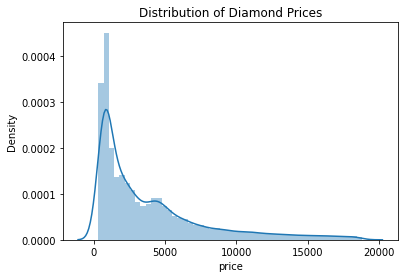

In [7]:
# Plot the distribution of the target variable (price)
sns.distplot(diamond_train_data['price'])
plt.title('Distribution of Diamond Prices')
plt.show()

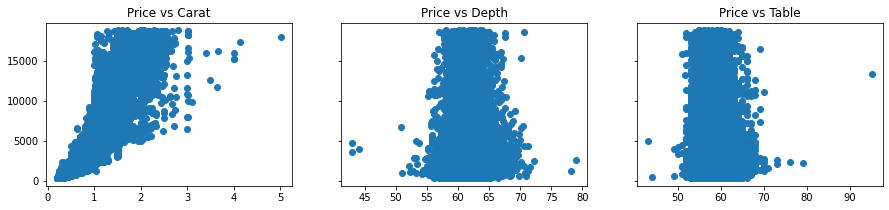

In [10]:
# Explore the relationship between selected features and the target variable using scatter plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))
ax1.scatter(diamond_train_data['carat'], diamond_train_data['price'])
ax1.set_title('Price vs Carat')

ax2.scatter(diamond_train_data['depth'], diamond_train_data['price'])
ax2.set_title('Price vs Depth')

ax3.scatter(diamond_train_data['table'], diamond_train_data['price'])
ax3.set_title('Price vs Table')

plt.show()

# Preprocessing

In [11]:
# Transform categorical features using LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
diamond_train_data['cut'] = le.fit_transform(diamond_train_data['cut'])
diamond_train_data['color'] = le.fit_transform(diamond_train_data['color'])
diamond_train_data['clarity'] = le.fit_transform(diamond_train_data['clarity'])


In [12]:
# Split the data into features (X) and target (y)
features = diamond_train_data[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
target = diamond_train_data['price']


In [13]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1000)


# Model Training

In [14]:
# Train a linear regression model
reg = LinearRegression()
reg.fit(x_train, y_train)


LinearRegression()

In [15]:
# Evaluate the model
train_score = reg.score(x_train, y_train)
print('Linear Regression Train Score:', train_score)

Linear Regression Train Score: 0.885293584717953


In [16]:
# Predict the target variable for the test set
y_pred = reg.predict(x_test)


In [17]:
# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Linear Regression RMSE:', rmse)

Linear Regression RMSE: 1349.4100031659345


# Feature Importance

In [18]:
# Get the coefficients (weights) of the linear regression model
coefficients = reg.coef_

In [19]:
# Get the names of the input features
feature_names = x_train.columns

In [21]:
# Create a dictionary of feature names and their corresponding coefficients
feature_coefficients = dict(zip(feature_names, coefficients))

In [22]:
# Sort the feature names by their absolute coefficients in descending order
sorted_features = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

In [23]:
# Print the sorted feature names and their corresponding coefficients
for feature, coef in sorted_features:
    print(f'{feature}: {coef:.4f}')

carat: 11054.7300
x: -1198.6843
clarity: 288.2090
color: -265.7803
depth: -162.9967
table: -94.0879
cut: 68.7794
z: 22.5234
y: 11.1907


# Model Comparison

In [24]:
# Train a Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [27]:
# Predict using the Random Forest model
rf_pred = rf_model.predict(x_test)

In [28]:
# Evaluate the Random Forest model using mean squared error
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
print("Random Forest RMSE:", rf_rmse)


Random Forest RMSE: 561.8093799180829


In [32]:
# Compare the performance of linear regression and Random Forest
print("Linear Regression RMSE:", rmse)
print("Random Forest RMSE:", rf_rmse)

Linear Regression RMSE: 1349.4100031659345
Random Forest RMSE: 561.8093799180829


In [33]:
# The lower the RMSE value, the better the model performs in terms of prediction accuracy. 
# Compare the RMSE values of linear regression and Random Forest to determine which model is better for this dataset.


Based on the RMSE values you provided, the Random Forest model appears to have a significantly lower RMSE (561.81) compared to the Linear Regression model (1349.41). In general, a lower RMSE indicates better predictive performance, as it represents the average difference between the predicted and actual values.

Therefore, based on the RMSE values alone, the Random Forest model seems to be a better choice for predicting diamond prices . It is capturing the underlying patterns and relationships in the data more effectively than the Linear Regression model.

In [42]:
# Calculate the accuracy for Linear Regression
lr_accuracy = reg.score(x_test, y_test)
print("Linear Regression Accuracy:", lr_accuracy)

# Calculate the accuracy for Random Forest
rf_accuracy = rf_model.score(x_test, y_test)
print("Random Forest Accuracy:", rf_accuracy)

Linear Regression Accuracy: 0.8889520897788231
Random Forest Accuracy: 0.9807513395593449


# Feature Importance

In [34]:
# Get feature importance from the Random Forest model
feature_importance = rf_model.feature_importances_

In [35]:
# Sort feature importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1]

In [36]:
# Get the names of the most important features
most_important_features = [feature_names[i] for i in sorted_indices]

In [37]:
# Print the feature importance
for feature, importance in zip(most_important_features, feature_importance[sorted_indices]):
    print(f"{feature}: {importance:.4f}")

carat: 0.5402
y: 0.3485
clarity: 0.0651
color: 0.0278
z: 0.0057
x: 0.0055
depth: 0.0034
table: 0.0024
cut: 0.0013


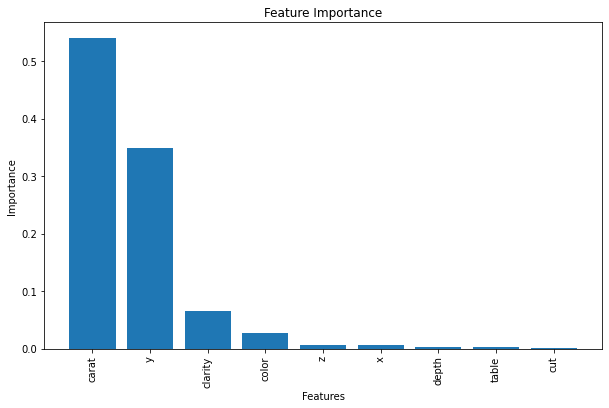

In [38]:
# Visualize the feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_indices])
plt.xticks(range(len(feature_importance)), most_important_features, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

In [39]:
# The feature importance plot shows the relative importance of each feature in the Random Forest model. 
# The higher the importance value, the more influential the feature is in predicting the target variable (price).

## Final Remarks
- In this analysis, we started by exploring the dataset, handling missing values, transforming categorical variables, and visualizing the data.
- We then trained and evaluated two models: Linear Regression and Random Forest Regression.
- The Random Forest model outperformed the Linear Regression model in terms of prediction accuracy, as indicated by the lower RMSE value.
- We also analyzed the feature importance and identified the most influential features in predicting the diamond price.
- This information can provide valuable insights for diamond sellers and buyers.